#### Code Used to Pull Stock Data into CSV
###### Depricated

In [2]:
import yfinance as yf

# Fetch AAPL stock data
stock_data = yf.download('AMZN', start='2020-01-01', end='2025-01-01')

# Export data to CSV
stock_data.to_csv('AMZN_stock_data.csv')


Failed to get ticker 'AMZN' reason: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMZN']: YFTzMissingError('possibly delisted; no timezone found')


/var/folders/fn/1jtndfnx627f_ntlsfhq1d8r0000gn/T/ipykernel_46411/2571220997.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock_data = pd.read_sql(query, conn)
2025-03-08 13:53:21.410651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-08 13:53:21.411146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/

Epoch 1/50


2025-03-08 13:53:21.487287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-08 13:53:21.488018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-08 13:53:21.488717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

30/30 [==============================] - 2s 18ms/step - loss: 0.0303
Epoch 2/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0045
Epoch 3/50
30/30 [==============================] - 1s 18ms/step - loss: 0.0026
Epoch 4/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 5/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0023
Epoch 6/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0024
Epoch 7/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 8/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 9/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 10/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0019
Epoch 11/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0018
Epoch 12/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0017
Epoch 13/50
30/30 [=============================

2025-03-08 13:53:51.572650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-03-08 13:53:51.573214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-03-08 13:53:51.573752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 0s 4ms/step


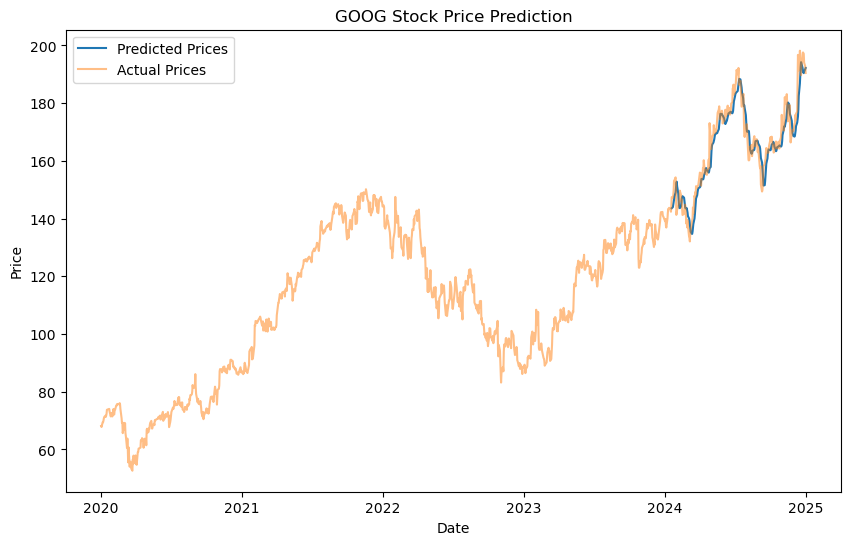

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from credentials import ipCred, usernameCred, passwordCred, databaseCred

def run_lstm_for_ticker():
    """
    Prompts the user for a ticker symbol, queries the corresponding
    MySQL table, trains an LSTM model, and plots the predictions.
    """
    
    # 1. Get ticker from user
    ticker = input("Enter the ticker symbol (e.g., AAPL, ORCL): ").strip().upper()
    
    # 2. Database connection parameters
    db_config = {
        'host': ipCred,
        'user': usernameCred,
        'password': passwordCred,
        'database': databaseCred
    }

    # 3. Establish connection and build the query dynamically
    conn = mysql.connector.connect(**db_config)
    
    # Note: The table name is assumed to be <ticker>_stock_data, e.g., AAPL_stock_data
    query = f"""
        SELECT Date_ AS date, Close_ AS close
        FROM {ticker}_stock_data
        WHERE Date_ BETWEEN '2020-01-01' AND '2025-01-01'
        ORDER BY Date_ ASC;
    """
    
    # 4. Read the query results into a DataFrame
    stock_data = pd.read_sql(query, conn)
    conn.close()

    # 5. Convert date column to datetime and set it as the index
    stock_data['date'] = pd.to_datetime(stock_data['date'])
    stock_data.set_index('date', inplace=True)

    # 6. Use the 'close' column for modeling
    closing_prices = stock_data[['close']]

    # 7. Normalize the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(closing_prices)

    # 8. Create the dataset for training
    def create_dataset(data, time_step=60):
        X, Y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i : (i+time_step), 0])
            Y.append(data[i+time_step, 0])
        return np.array(X), np.array(Y)

    time_step = 60
    X, Y = create_dataset(scaled_data, time_step)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # 9. Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]

    # 10. Define the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, Y_train, epochs=50, batch_size=32)

    # 11. Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    # 12. Plot results
    plt.figure(figsize=(10,6))
    # Adjust the starting index to account for the time steps offset
    plt.plot(stock_data.index[train_size+time_step+1:], predictions, label="Predicted Prices")
    plt.plot(stock_data.index, stock_data['close'], label="Actual Prices", alpha=0.5)
    plt.title(f"{ticker} Stock Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    run_lstm_for_ticker()